In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read IceCream data
icecream = pd.read_csv('IceCreamData.csv')

In [3]:
# First 5 rows
icecream.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


## Data Processing

In [4]:
# Check if there is any duplicate data
icecream.loc[icecream.duplicated(),:]

,Temperature,Revenue


In [5]:
icecream.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

In [6]:
icecream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


## IceCream Correlation

In [7]:
icecream.corr()

,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000


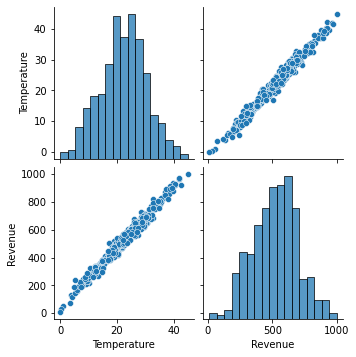

In [8]:
import seaborn as sns
sns.pairplot(icecream)

## Simple Linear Regression

In [9]:
X = icecream.iloc[:,0].values.reshape(-1,1)    
y = icecream.iloc[:,-1].values

In [10]:
X

array([[24.56688442],
       [26.00519115],
       [27.79055388],
       [20.59533505],
       [11.50349764],
       [14.35251388],
       [13.70777988],
       [30.83398474],
       [ 0.97686999],
       [31.66946458],
       [11.45525338],
       [ 3.66466958],
       [18.81182403],
       [13.62450892],
       [39.53990899],
       [18.48314099],
       [25.93537514],
       [42.51528041],
       [29.58948056],
       [21.77594799],
       [25.45783637],
       [15.21456942],
       [22.61931574],
       [16.25872074],
       [23.88172478],
       [18.97830025],
       [15.6614643 ],
       [29.18504465],
       [19.02461092],
       [35.12015142],
       [24.18393726],
       [15.23119012],
       [ 8.79095281],
       [18.23322784],
       [35.62892497],
       [37.05754246],
       [22.28455032],
       [17.51707397],
       [31.7379196 ],
       [17.04973761],
       [23.0034888 ],
       [ 8.75555394],
       [18.77535808],
       [14.10966102],
       [18.63391286],
       [15

In [11]:
y

array([ 534.7990284 ,  625.1901215 ,  660.6322888 ,  487.7069603 ,
        316.2401944 ,  367.9407438 ,  308.8945179 ,  696.7166402 ,
         55.39033824,  737.8008241 ,  325.9684084 ,   71.16015301,
        467.4467066 ,  289.5409341 ,  905.4776043 ,  469.9090332 ,
        648.2099977 ,  921.508275  ,  649.5611747 ,  534.6228653 ,
        612.1539491 ,  353.3256334 ,  524.2361154 ,  374.231135  ,
        523.1245467 ,  473.6043349 ,  402.4553204 ,  679.3177906 ,
        517.5340283 ,  809.6720534 ,  528.3804165 ,  356.0980075 ,
        237.7639106 ,  418.1372788 ,  809.4634112 ,  870.7659159 ,
        550.2785159 ,  405.6614459 ,  740.9356848 ,  501.7329901 ,
        539.6880057 ,  242.2362083 ,  421.621505  ,  358.0028493 ,
        467.631063  ,  396.9356482 ,  500.9250645 ,  651.8615363 ,
        451.4507843 ,  697.8339862 ,  190.7109408 ,  621.1897304 ,
        666.1368355 ,  628.4532107 ,  219.3039932 ,  623.5988607 ,
        749.3671543 ,  827.6848313 ,  303.7343815 ,  351.28886

In [12]:
# split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.30, random_state=0)

In [13]:
# import the Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression
#initialize the simple linear regression model
slr =LinearRegression()
slr


LinearRegression()

In [14]:
# Fit model
slr.fit(X_train,y_train)

LinearRegression()

In [15]:
# Predicted the result
y_pred= slr.predict(X_test)
y_pred

array([697.40760182, 652.67518783, 664.01048102, 451.14537645,
       664.75022673, 442.05219958, 583.85242913, 623.3625391 ,
       666.7500596 , 469.23604811, 546.84832099, 444.08266531,
       622.49432909, 378.73035124, 368.21119457, 943.18564123,
       891.63651167, 693.5479008 , 546.07634654, 421.39940399,
       392.08451996, 596.71982427, 284.91295994, 654.83874688,
       382.05091808, 413.18421083, 372.17594967, 510.48997583,
       480.14543708, 457.26943784, 639.55061011, 283.33932566,
       315.67211819, 470.5172469 , 559.66448707, 539.8163622 ,
       309.24695716, 508.91264932, 571.29876902, 731.11193473,
       441.12952919, 494.7446538 , 567.45606027, 444.60923294,
       912.17744272, 602.86026073, 541.88552358, 202.15022192,
       693.13862264, 352.35035317, 191.75736834, 576.63952464,
       218.6500316 , 468.66672894, 462.36421819, 449.07885871,
       495.24147022, 799.7974912 , 332.62076008, 540.48871157,
       660.49777207, 526.81456218, 361.85571542, 452.08

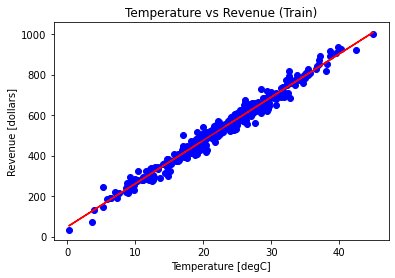

In [16]:
# Visualizing the Result (Training_Set)
plt.scatter(X_train,y_train, color= 'blue')
plt.plot(X_train, slr.predict(X_train), color= 'red' )
plt.title('Temperature vs Revenue (Train)')
plt.xlabel('Temperature [degC]')
plt.ylabel('Revenue [dollars]')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

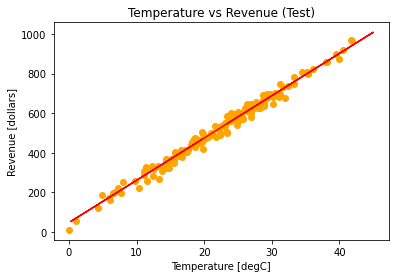

In [17]:
# Visualizing the Result (Test Set)
plt.scatter(X_test,y_test, color='orange')
plt.plot(X_train, slr.predict(X_train), color='red')
plt.title('Temperature vs Revenue (Test)')
plt.xlabel('Temperature [degC]')
plt.ylabel('Revenue [dollars]')
plt.show

In [18]:
#To retrieve the intercept:
print(slr.intercept_)

#For retrieving the slope:
print(slr.coef_)


46.915501046762756
[21.37822239]


<function matplotlib.pyplot.show(close=None, block=None)>

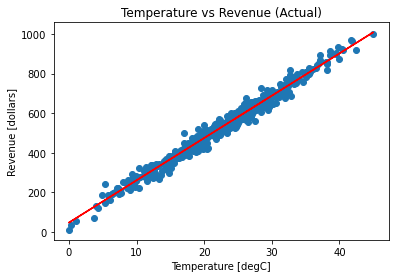

In [19]:
# y = mx + c linear regression model
line = slr.intercept_ + slr.coef_ * X

#Scatter plot for actual data
plt.scatter(X,y)
plt.plot(X,line, color="red")
plt.title('Temperature vs Revenue (Actual)')
plt.xlabel('Temperature [degC]')
plt.ylabel('Revenue [dollars]')
plt.show

In [20]:
# Evaluation
from sklearn import metrics # best result 0
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))     
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 17.976807512195343
Mean Squared Error: 503.3547092334282
Root Mean Squared Error: 22.43556794987433
R2 Score: 0.9854012979456143
